# Table of Contents
* [1. Loading dataset and importing required libraries](#chapter1)
* [2. Checking the types of data and Categorizing columns](#chapter2)

* [3. Dropping irrelevant columns](#chapter3)
* [4. Renaming the columns](#chapter3)

* [5. Dropping the duplicate rows](#chapter3)

* [6. Dropping the missing values](#chapter3)

* [7. Detecting Outliers](#chapter3)

* [8. Plot different features against one another (scatter), against frequency (histogram)](#chapter3)

* [9. Univariate Analysis](#chapter3)
    * [9.1 Steps of doing Univariate Analysis on Numerical columns](#section_3_1)
        * [9.1.1 Univariate analysis on HP Column:](#sub_section_3_1_1)
        * [9.1.2 Univariate analysis on MPG-H column:](#sub_section_3_1_2)
        * [9.1.3 Univariate analysis on MPG-C column:]()
        
        
 
    
    * [9.2 Steps of doing Univariate Analysis on Categorical columns](#section_3_2)
        * [9.2.1 Univariate analysis on Make column:](#sub_section_3_2_1)
        * [9.2.2 Univariate analysis on Year column:]()
        * [9.2.3 Univariate analysis on Transmission column:]()
        
        
        
* [10. Bivariate Analysis](#chapter3)


# EDA on Car_Features dataset:
Link for the dataset: https://www.kaggle.com/datasets/CooperUnion/cardataset

#### What is EDA?

Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis.


#### How to perform Exploratory Data Analysis ?
This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

## 1. Loading dataset and importing required libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('data.csv')

In [76]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [77]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Why do EDA?

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

Remember it is an iterative process

## 2. Checking the types of data and Categorizing columns


In [78]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

#### Categorizing Column Types:

- **Numerical** - Engine HP, Highway mpg, city mpg, MSRP, Engine Cylinders.
- **Categorical** - Make, Model, Year, Engine fuel type, Transmision type, driven_wheels, Vehicle size, Vehicle style.
- **Mixed** - Number of doors, Market category, Popularity.


## 3. Dropping irrelevant columns
This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [79]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 4. Renaming the columns
In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [80]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 5. Dropping the duplicate rows
This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [81]:
df.shape

(11914, 10)

In [82]:
duplicate_rows_df = df[df.duplicated()]
print("number of dupicate rows:", duplicate_rows_df.shape)

number of dupicate rows: (989, 10)


In [83]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [84]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [85]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

## 6. Dropping the missing values
This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [86]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [87]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [88]:
print(df.isnull().sum()) 

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


## 7. Detecting Outliers
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from towards data science.

<Axes: xlabel='Price'>

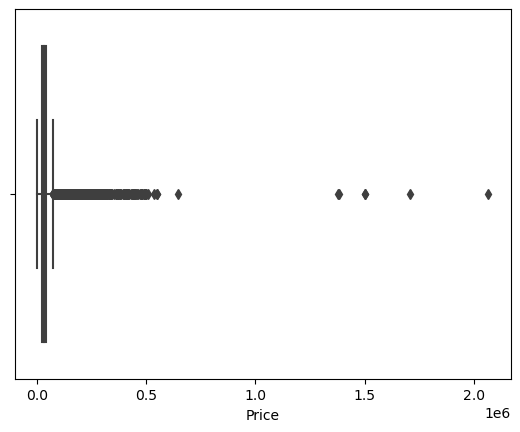

In [89]:
sns.boxplot( x=df['Price'] )

<Axes: xlabel='HP'>

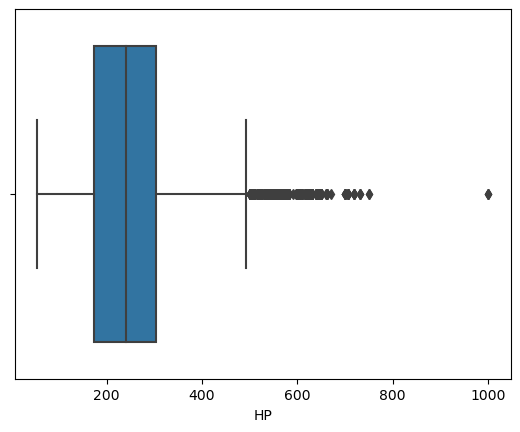

In [90]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

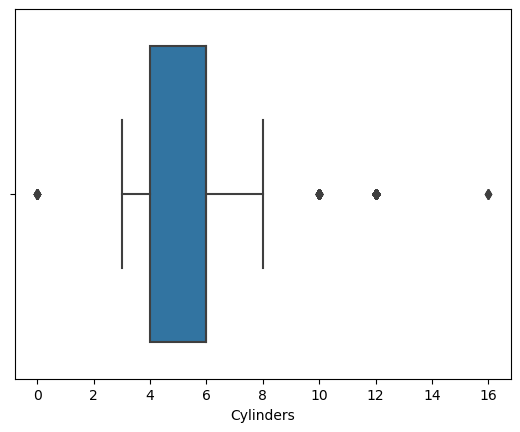

In [91]:
sns.boxplot(x=df['Cylinders'])

In [92]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  #interquantile range 
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_1448\2219320529.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_1448\2219320529.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [93]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

C:\Users\KIIT\AppData\Local\Temp\ipykernel_1448\4147643536.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(9191, 10)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.

## 8. Plot different features against one another (scatter), against frequency (histogram)

##### Histogram
Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

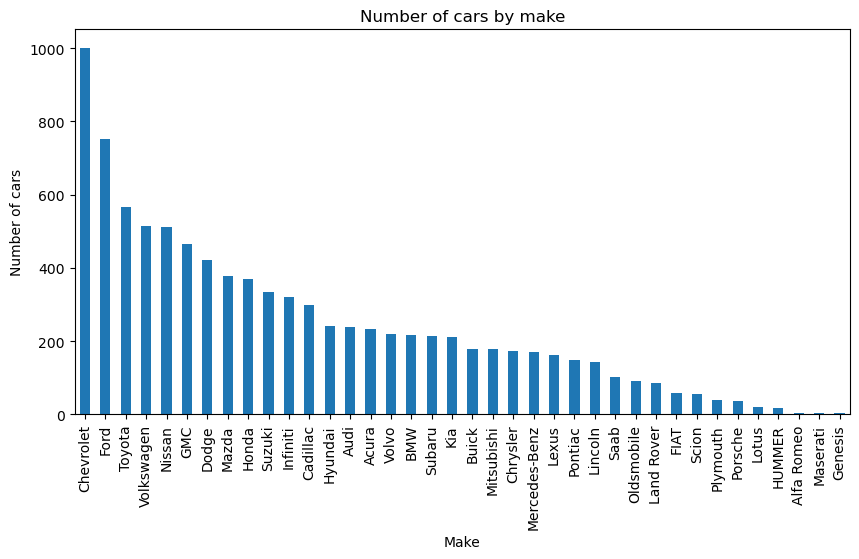

In [94]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

##### Heat Maps
Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_1448\2320829368.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


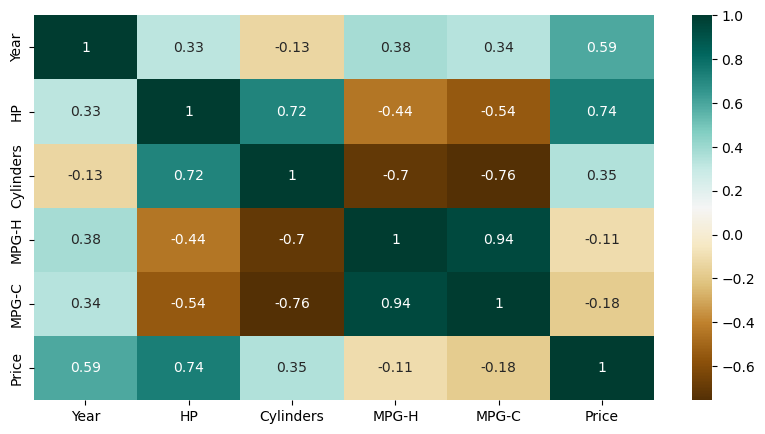

In [95]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap='BrBG', annot= True)
c


##### Scatterplot
We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

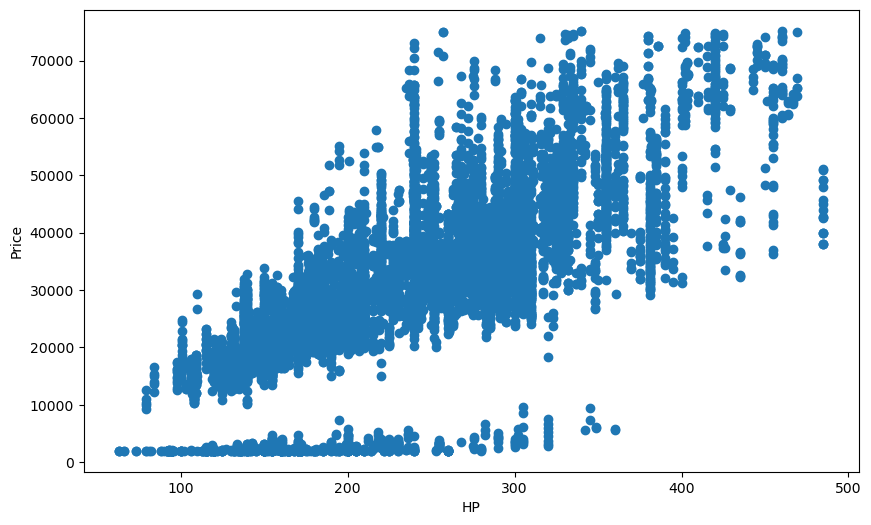

In [96]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.

## 9. Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### 9.1 Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


#### 9.1.1 Univariate analysis on HP Column:


In [97]:
df['HP'].describe()

count    9191.000000
mean      236.735285
std        76.816966
min        63.000000
25%       175.000000
50%       230.000000
75%       290.000000
max       485.000000
Name: HP, dtype: float64

<Axes: ylabel='Frequency'>

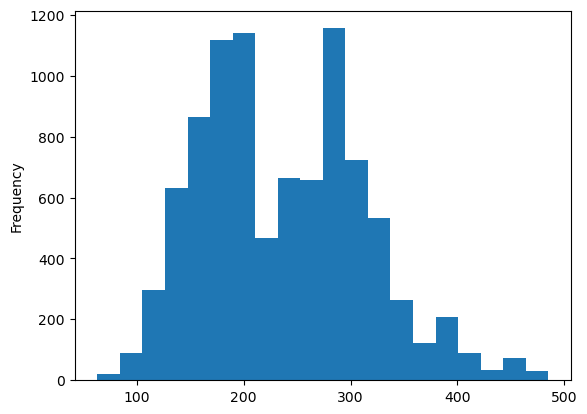

In [98]:
df['HP'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

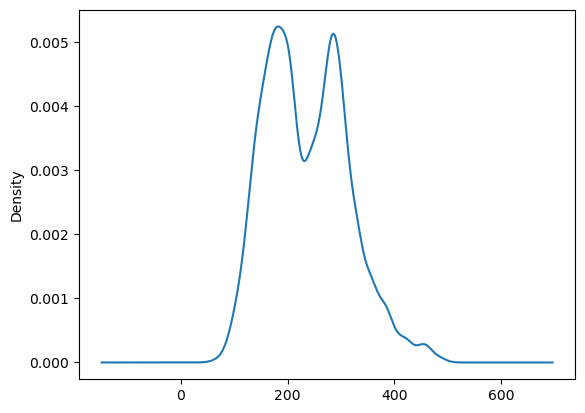

In [99]:
df['HP'].plot(kind='kde')

In [100]:
df['HP'].skew()
# It means the data is positively skewed.

0.43259802097347116

<Axes: >

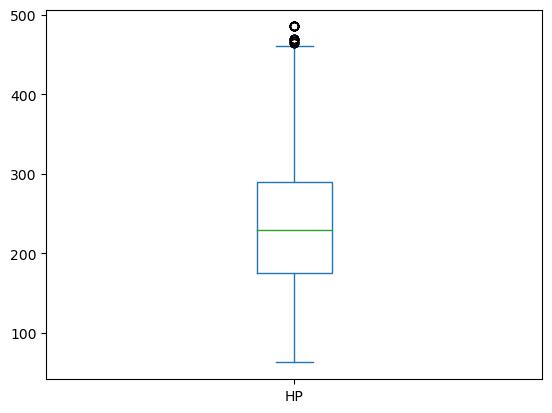

In [101]:
df['HP'].plot(kind='box')

In [102]:
df[df['HP'] > 800]
# No outliers are present.

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price


In [103]:
df['HP'].isnull().sum()

0

In [104]:
df['HP'].isnull().sum()/len(df['HP'])
# This means there are no missing values.

0.0

#### 9.1.2 Univariate analysis on MPG-H column:


In [106]:
df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [107]:
df['MPG-H'].describe()

count    9191.000000
mean       26.432053
std         5.715501
min        13.000000
25%        22.000000
50%        26.000000
75%        30.000000
max        42.000000
Name: MPG-H, dtype: float64

<Axes: ylabel='Frequency'>

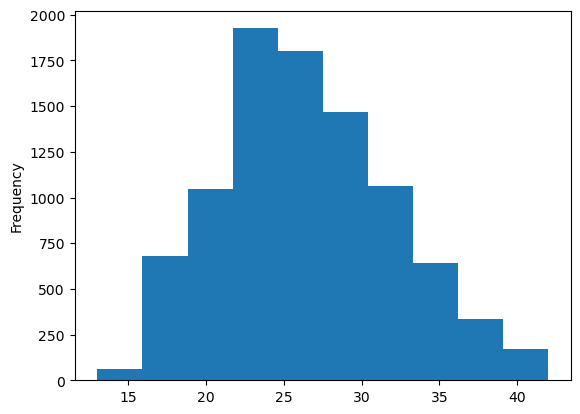

In [108]:
df['MPG-H'].plot(kind='hist')

<Axes: ylabel='Density'>

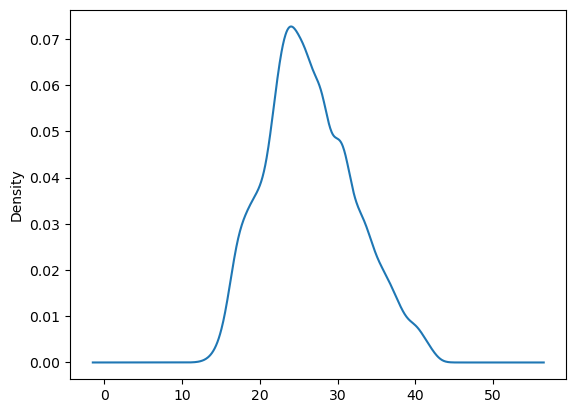

In [109]:
df['MPG-H'].plot(kind='kde')

In [110]:
df['MPG-H'].skew()
# Can say that there is no skewness in the data 

0.3405629321760563

<Axes: >

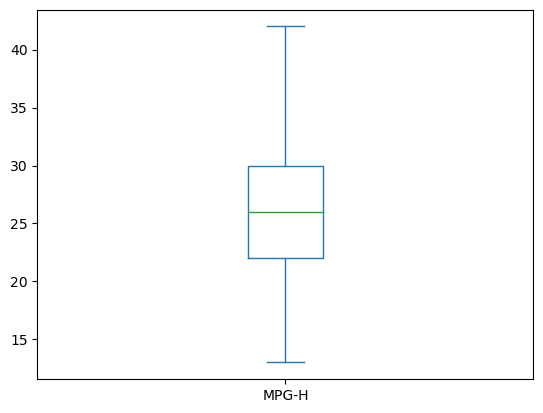

In [111]:
df['MPG-H'].plot(kind='box')

In [112]:
df['MPG-H'].isnull().sum()


0

#### 9.1.3 Univariate analysis on MPG-C column:


In [113]:
df['MPG-C'].describe()

count    9191.000000
mean       19.251877
std         4.366754
min        10.000000
25%        16.000000
50%        18.000000
75%        22.000000
max        31.000000
Name: MPG-C, dtype: float64

<Axes: ylabel='Frequency'>

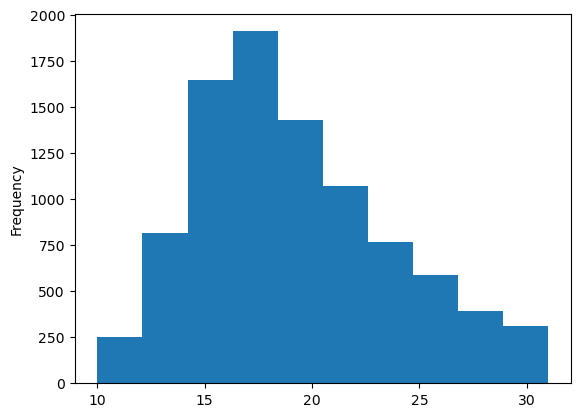

In [114]:
df['MPG-C'].plot(kind='hist')

<Axes: ylabel='Density'>

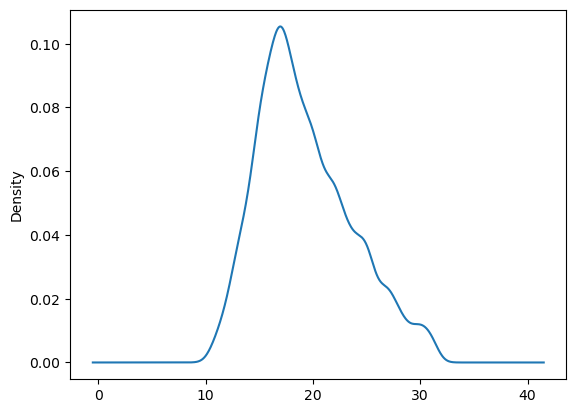

In [115]:
df['MPG-C'].plot(kind='kde')

In [116]:
df['MPG-C'].skew()
# Can say that there is slight skewness in the data, though no need to bother. 

0.5872685871973331

<Axes: >

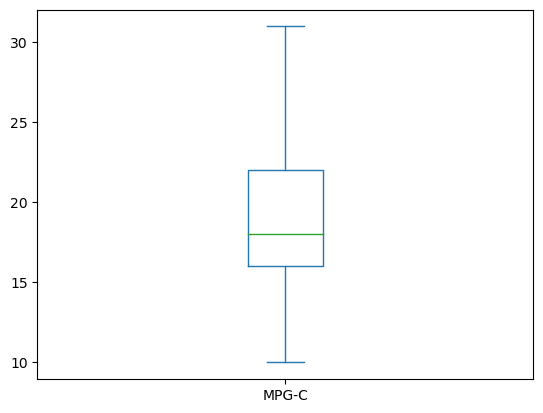

In [117]:
df['MPG-C'].plot(kind='box')

#### 9.1.4 Univariate analysis on Price column:


In [119]:
df['Price'].isnull().sum()
# No null values

0

In [120]:
df['Price'].describe()

count     9191.000000
mean     30976.473615
std      14992.073695
min       2000.000000
25%      22095.000000
50%      29990.000000
75%      39730.000000
max      75200.000000
Name: Price, dtype: float64

<Axes: ylabel='Frequency'>

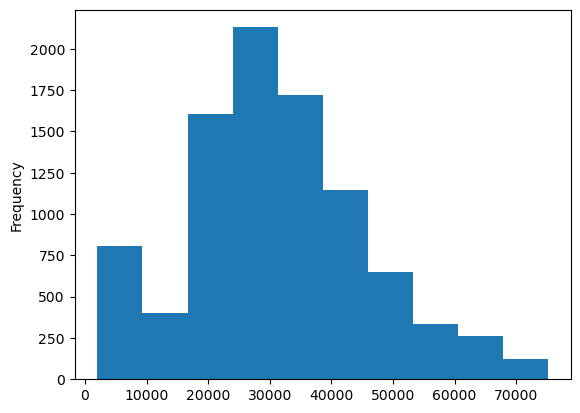

In [121]:
df['Price'].plot(kind='hist')

<Axes: ylabel='Density'>

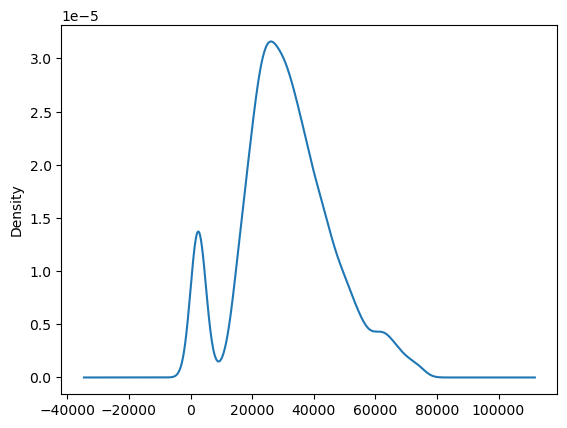

In [122]:
df['Price'].plot(kind='kde')

In [123]:
df['Price'].skew()
# Can say that there is slight skewness in the data, though no need to bother. 

0.22873679873783564

<Axes: >

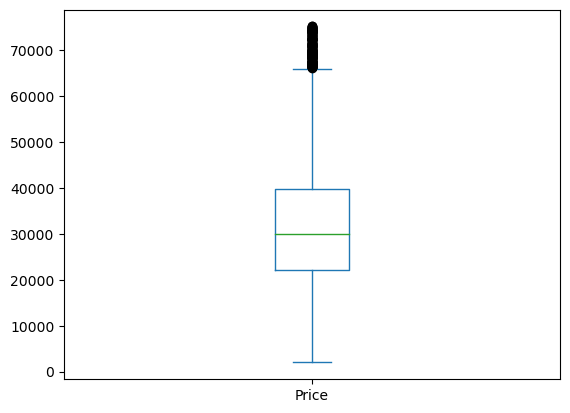

In [124]:
df['Price'].plot(kind='box')

In [125]:
df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


### 9.2 Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

#### 9.2.1 Univariate analysis on Make column:


In [126]:
df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [127]:
df['Make'].value_counts()

Chevrolet        1001
Ford              753
Toyota            567
Volkswagen        515
Nissan            512
GMC               466
Dodge             423
Mazda             378
Honda             371
Suzuki            335
Infiniti          322
Cadillac          300
Hyundai           241
Audi              240
Acura             232
Volvo             221
BMW               218
Subaru            214
Kia               211
Buick             180
Mitsubishi        178
Chrysler          173
Mercedes-Benz     170
Lexus             162
Pontiac           148
Lincoln           142
Saab              101
Oldsmobile         91
Land Rover         87
FIAT               58
Scion              55
Plymouth           39
Porsche            38
Lotus              20
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Make, dtype: int64

<Axes: >

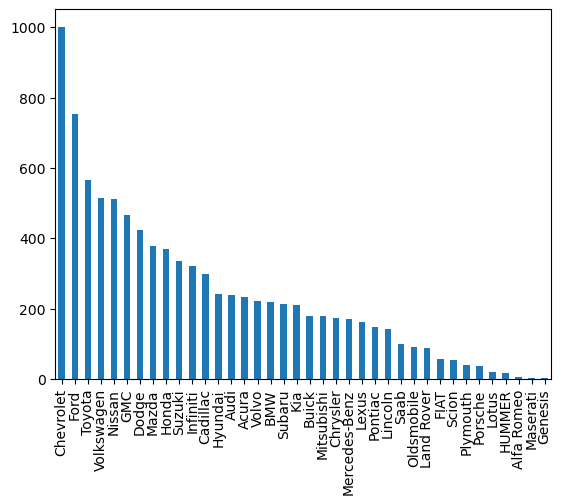

In [128]:
df['Make'].value_counts().plot(kind='bar')

<Axes: ylabel='Make'>

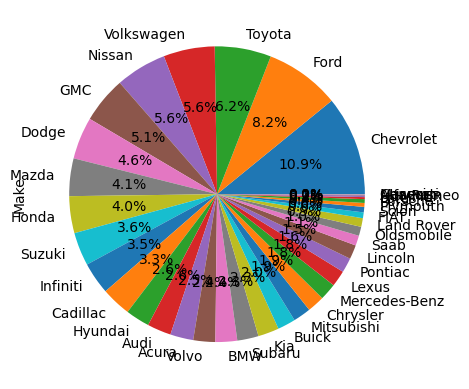

In [129]:
df['Make'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [130]:
df['Make'].isnull().sum()

0

In [131]:
df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


#### 9.2.2 Univariate analysis on Year column:


In [132]:
df['Year'].value_counts()

2016    1746
2015    1710
2017    1391
2014     394
2009     320
2007     317
2012     298
2008     288
2013     270
2011     247
2010     247
2003     212
2004     212
2002     191
2005     190
2006     185
2001     155
1997     147
1998     143
2000     113
1994     109
1999     108
1995     101
1996      97
Name: Year, dtype: int64

<Axes: >

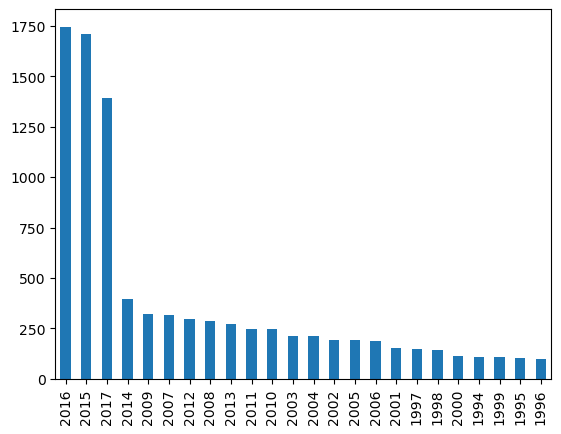

In [133]:
df['Year'].value_counts().plot(kind='bar')

<Axes: ylabel='Year'>

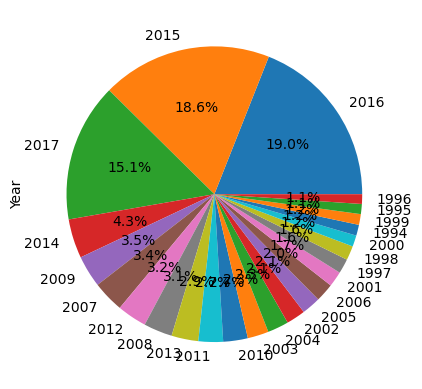

In [134]:
df['Year'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [135]:
df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


### 9.2.3 Univariate analysis on Transmission column:


In [137]:
df['Transmission'].value_counts()

AUTOMATIC           6834
MANUAL              2030
AUTOMATED_MANUAL     319
UNKNOWN                8
Name: Transmission, dtype: int64

<Axes: >

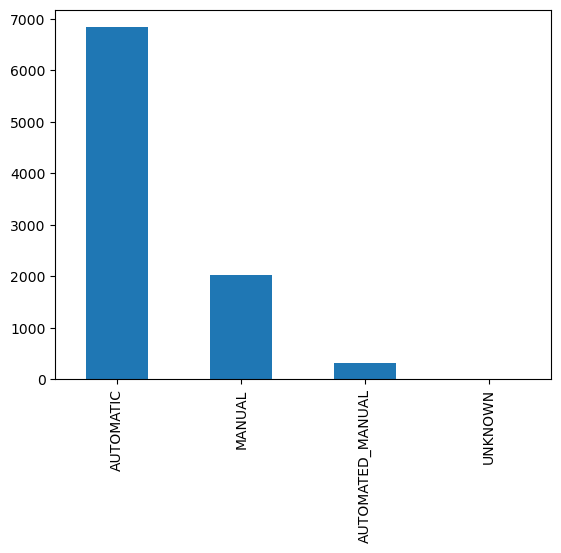

In [138]:
df['Transmission'].value_counts().plot(kind='bar')

<Axes: ylabel='Transmission'>

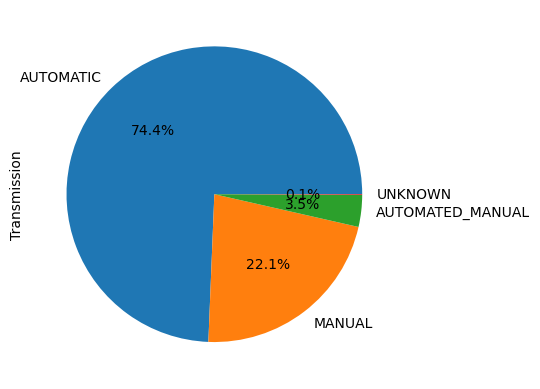

In [139]:
df['Transmission'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [140]:
df

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


In [141]:
df['Drive Mode'].value_counts()

front wheel drive    3734
rear wheel drive     2417
all wheel drive      1911
four wheel drive     1129
Name: Drive Mode, dtype: int64

<Axes: >

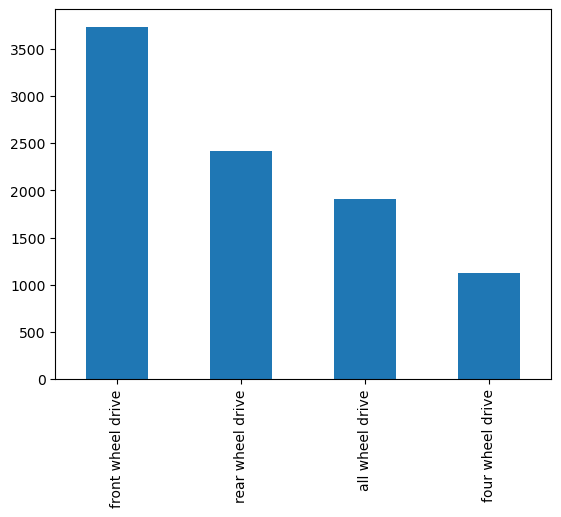

In [142]:
df['Drive Mode'].value_counts().plot(kind='bar')

<Axes: ylabel='Drive Mode'>

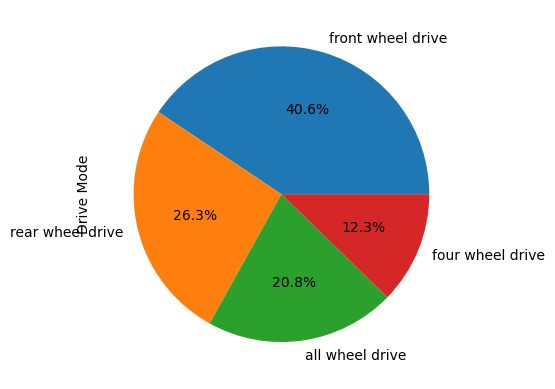

In [143]:
df['Drive Mode'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [144]:
df.head(15)


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200


In [145]:
df.tail(15)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
11896,BMW,Z4,2014,335.0,6.0,AUTOMATED_MANUAL,rear wheel drive,24,17,65800
11897,BMW,Z4,2015,240.0,4.0,MANUAL,rear wheel drive,34,22,48950
11898,BMW,Z4,2015,300.0,6.0,AUTOMATED_MANUAL,rear wheel drive,24,17,56950
11899,BMW,Z4,2015,335.0,6.0,AUTOMATED_MANUAL,rear wheel drive,24,17,65800
11900,BMW,Z4,2016,300.0,6.0,AUTOMATED_MANUAL,rear wheel drive,24,17,57500
11901,BMW,Z4,2016,240.0,4.0,MANUAL,rear wheel drive,34,22,49700
11902,BMW,Z4,2016,335.0,6.0,AUTOMATED_MANUAL,rear wheel drive,24,17,66350
11906,Acura,ZDX,2011,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46020
11907,Acura,ZDX,2011,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56570
11908,Acura,ZDX,2011,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50520


MODEL COLUMN IS LEFT, WE'LL PERFORM FEATURE ENGG...

## 10. Bivariate Analysis

Bivariate Analysis involves looking at two variables at a time. Bivariate EDA can help you understand the relationship between two variables and identify any patterns that might exist
### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [146]:
df.head(25)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,26,17,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,28,20,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,28,18,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,27,18,37200


#### Categorical - Categorical 
- Make column v/s Model column
- Year column v/s Transmission column
- Transmission column v/s Drive Mode column

    - Approach:  
       - cross-tabulations or contingency tables
       - heatmap, stacked barplots, treemaps

    - Conclusions: 
       - From the above representation we can draw the conclusion that PClass 1 is the most safest class to travel and PClass 3 is the most unsafest one.


In [147]:
pd.crosstab(df['Year'],df['Transmission'],normalize='columns')*100

Transmission,AUTOMATED_MANUAL,AUTOMATIC,MANUAL,UNKNOWN
Year,,,,
1994,0.000000,0.512145,3.645320,0.0
1995,0.000000,0.702371,2.610837,0.0
1996,0.000000,0.658472,2.561576,0.0
1997,0.000000,0.717003,4.778325,12.5
1998,0.000000,0.731636,4.581281,0.0
1999,0.000000,0.804800,2.512315,25.0
2000,0.000000,0.790167,2.660099,62.5
2001,0.000000,1.346210,3.103448,0.0
2002,0.000000,2.033948,2.561576,0.0


<Axes: xlabel='Transmission', ylabel='Year'>

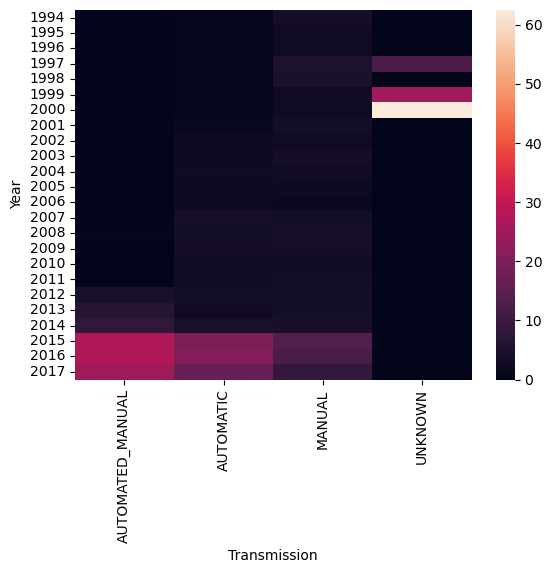

In [148]:
# Heatmap
sns.heatmap(pd.crosstab(df['Year'],df['Transmission'],normalize='columns')*100)

From the above heatmap and cross-tabulations we can infer that with the passing of years the trasmission has been upgrading towards automatic from manual.